# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, na_values=["?"])

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [13]:
df.columns = pd.RangeIndex(1, len(df.columns)+1) 

In [14]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [26]:
df[11] = df[11].astype(float)
df[15] = df[15].astype(float)

In [27]:
df.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11    float64
12     object
13     object
14    float64
15    float64
16     object
dtype: object

In [47]:
df.isnull().sum()

1     12
2     12
3      0
4      6
5      6
6      9
7      9
8      0
9      0
10     0
11     0
12     0
13     0
14    13
15     0
16     0
dtype: int64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [28]:
df.columns

RangeIndex(start=1, stop=17, step=1)

In [56]:
accepted = df[df[16]=="+"]
rejected = df[df[16]=="-"]

In [33]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [57]:
df.describe()

,2,3,8,11,14,15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [58]:
accepted.describe()

,2,3,8,11,14,15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


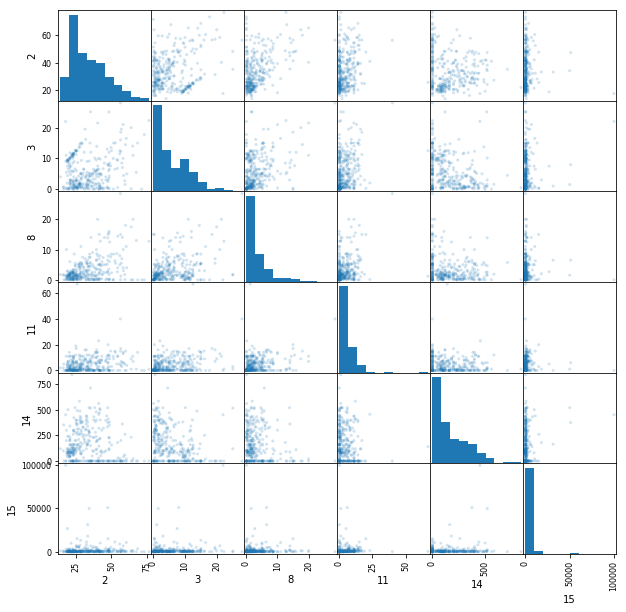

In [73]:
pd.plotting.scatter_matrix(accepted, alpha=.2, figsize=(10,10));

In [59]:
rejected.describe()

,2,3,8,11,14,15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [95]:
rejected.describe(exclude='number')

,1,4,5,6,7,9,10,12,13,16
count,374,381,381,378,378,383,383,383,383,383
unique,2,2,2,14,9,2,2,2,3,1
top,b,u,g,c,v,f,f,f,g,-
freq,262,263,263,75,230,306,297,213,338,383


In [96]:
accepted.describe(exclude='number')

,1,4,5,6,7,9,10,12,13,16
count,304,303,303,303,303,307,307,307,307,307
unique,2,3,3,14,9,2,2,2,3,1
top,b,u,g,c,v,t,t,f,g,+
freq,206,256,256,62,169,284,209,161,287,307


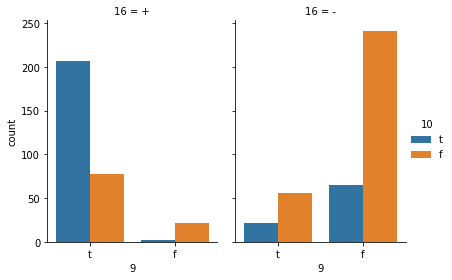

In [148]:
g = sns.catplot(x=9, hue=10, col=16,data=df, kind="count", height=4, aspect=.7);

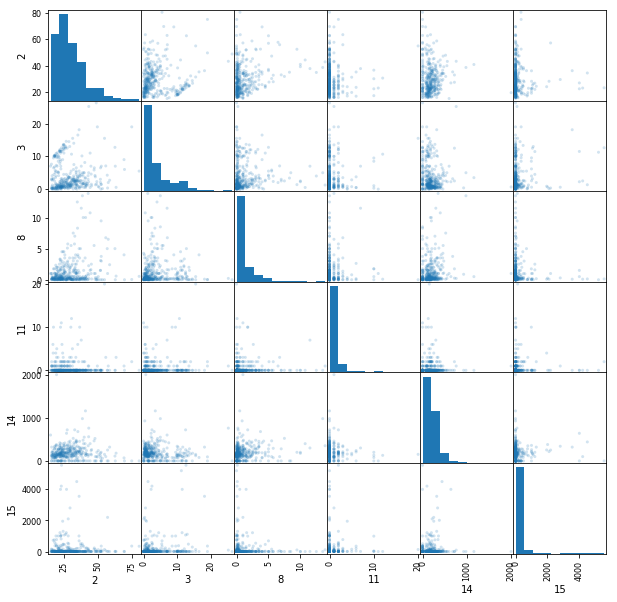

In [72]:
pd.plotting.scatter_matrix(rejected, alpha=.2, figsize=(10,10));

           2         3         8         11          14           15
16                                                                  
+   33.720492  5.904951  3.427899  4.605863  164.421927  2038.859935
-   29.808231  3.839948  1.257924  0.631854  199.699468   198.605744


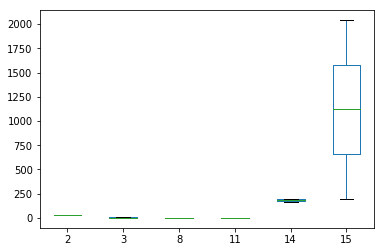

In [45]:
print(df.groupby(by=16).mean())

df.groupby(by=16).mean().plot(kind='box')

plt.show()

In [143]:
df.groupby(by=16).describe().T

16                    +            -
2  count     305.000000   373.000000
   mean       33.720492    29.808231
   std        12.809641    10.919291
   min        13.750000    15.170000
   25%        23.170000    22.000000
   50%        30.500000    27.330000
   75%        41.330000    34.830000
   max        76.750000    80.250000
3  count     307.000000   383.000000
   mean        5.904951     3.839948
   std         5.471485     4.337662
   min         0.000000     0.000000
   25%         1.500000     0.835000
   50%         4.460000     2.210000
   75%         9.520000     5.000000
   max        28.000000    26.335000
8  count     307.000000   383.000000
   mean        3.427899     1.257924
   std         4.120792     2.120481
   min         0.000000     0.000000
   25%         0.750000     0.125000
   50%         2.000000     0.415000
   75%         5.000000     1.500000
   max        28.500000    13.875000
11 count     307.000000   383.000000
   mean        4.605863     0.631854
   std         6.320242     1.900049
   min         0.000000     0.000000
   25%         0.000000     0.000000
   50%         3.000000     0.000000
   75%         7.000000     0.000000
   max        67.000000    20.000000
14 count     301.000000   376.000000
   mean      164.421927   199.699468
   std       161.770675   181.564835
   min         0.000000     0.000000
   25%         0.000000   100.000000
   50%       120.000000   167.500000
   75%       280.000000   272.000000
   max       840.000000  2000.000000
15 count     307.000000   383.000000
   mean     2038.859935   198.605744
   std      7659.763941   671.608839
   min         0.000000     0.000000
   25%         0.000000     0.000000
   50%       221.000000     1.000000
   75%      1209.000000    67.000000
   max    100000.000000  5552.000000

In [62]:
stats.ttest_ind(accepted[15], rejected[15], nan_policy='omit')

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [78]:
stats.ttest_ind(accepted[14], rejected[14], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [102]:
accepted.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [118]:
df.iloc[:, :].head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [121]:
accepted.shape

(307, 16)

In [122]:
rejected.shape

(383, 16)

In [144]:
df[df[16]=="+"].head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [133]:
pd.crosstab(df[16], df[9])

9,f,t
16,,
+,23,284
-,306,77


In [136]:
observation9 = pd.crosstab(df[16], df[9]).values

In [135]:
pd.crosstab(df[16], df[10])

10,f,t
16,,
+,98,209
-,297,86


In [166]:
pd.crosstab(df[16], df[4])

4,l,u,y
16,,,
+,2,256,45
-,0,263,118


In [167]:
pd.crosstab(df[16], df[7])

7,bb,dd,ff,h,j,n,o,v,z
16,,,,,,,,,
+,25,2,8,87,3,2,1,169,6
-,34,4,49,51,5,2,1,230,2


In [172]:
observation10 = pd.crosstab(df[16], df[9]).values

In [175]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observation9)

In [176]:
chi_squared, p_value, expected

(355.2038167412799,
 3.1185900878457007e-79,
 array([[146.38115942, 160.61884058],
        [182.61884058, 200.38115942]]))

In [180]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observation10)

In [181]:
chi_squared, p_value, expected

(143.06956205083145,
 5.675727374527571e-33,
 array([[175.74637681, 131.25362319],
        [219.25362319, 163.74637681]]))

In [152]:
observation5 = pd.crosstab(df[16], df[5]).values

stats.chi2_contingency(observation5)

(26.234074966202144,
 2.010680204180363e-06,
 2,
 array([[229.90789474,   0.88596491,  72.20614035],
        [289.09210526,   1.11403509,  90.79385965]]))

In [153]:
observation4 = pd.crosstab(df[16], df[4]).values

stats.chi2_contingency(observation4)

(26.234074966202144,
 2.010680204180363e-06,
 2,
 array([[  0.88596491, 229.90789474,  72.20614035],
        [  1.11403509, 289.09210526,  90.79385965]]))

In [156]:
observation6 = pd.crosstab(df[16], df[6]).values

stats.chi2_contingency(observation6)

(98.32520342679135,
 3.4999300402715717e-15,
 13,
 array([[24.02643172, 60.95594714, 18.24229075, 13.34801762, 11.12334802,
         23.5814978 , 26.25110132,  4.44933921, 22.69162996, 16.90748899,
         34.70484581,  1.33480176, 28.47577093, 16.90748899],
        [29.97356828, 76.04405286, 22.75770925, 16.65198238, 13.87665198,
         29.4185022 , 32.74889868,  5.55066079, 28.30837004, 21.09251101,
         43.29515419,  1.66519824, 35.52422907, 21.09251101]]))

In [158]:
df[7].value_counts()

v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: 7, dtype: int64

In [162]:
df.groupby([16])[7].value_counts()

16  7 
+   v     169
    h      87
    bb     25
    ff      8
    z       6
    j       3
    dd      2
    n       2
    o       1
-   v     230
    h      51
    ff     49
    bb     34
    j       5
    dd      4
    n       2
    z       2
    o       1
Name: 7, dtype: int64

In [165]:
accepted.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [179]:
observation7 = pd.crosstab(accepted[16], df[7])

stats.chi2_contingency(observation7)

(0.0, 1.0, 0, array([[ 25.,   2.,   8.,  87.,   3.,   2.,   1., 169.,   6.]]))

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The tests that I've run on the given data lead me to believe that columns A15, A10, and A9 are most relevant for determining whether or not an individual was approved for a loan.

The t-test performed upon column A15 (which one may infer to be a marker of income due to the distribution and variance among the numerals) failed to reject the null hypothesis that the data contain therein was independent from approval status.

The t-test performed upon column A14 produced the highest p-value, indicating the weakest evidence against the null hypothesis of the variables being independent.

The chi squared test done with categorical column A7 suggests it is an independent variable.

The chi squared test on column A10 suggests it is a dependent variable.

The most challenging component of this sprint challenge was implementing and interpreting the chi squared tests.
